In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
pip install language_tool_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 4.0 MB/s eta 0:00:00


In [ ]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')

SystemError: Detected java 11.0. LanguageTool requires Java >= 17 for version latest.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/phishing detector/Phishing_Email1.csv');
data = data.dropna(subset=['Email Text'])
data = data[data['Email Text'].str.strip() != 'empty']
data = data[data['Email Text'].str.strip() != '']
data

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
18644,18645,\nRick Moen a Ã©crit:> > I'm confused. I thou...,Safe Email
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email


Email Type
Safe Email        11124
Phishing Email     6974
Name: count, dtype: int64


Text(0.5, 1.0, 'Safe vs phishing')

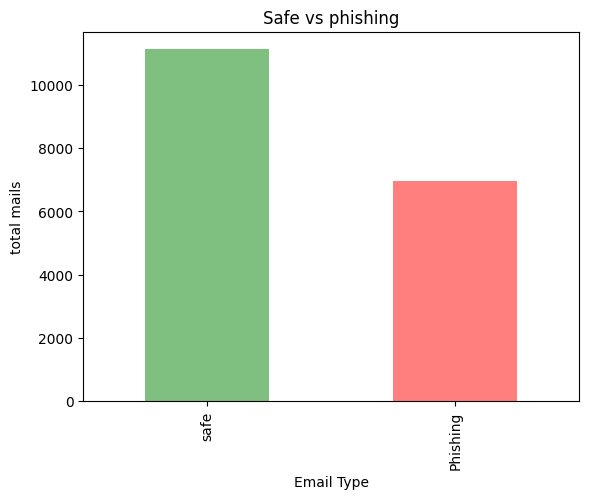

In [ ]:
counts = data['Email Type'].value_counts()
print(counts)
counts.plot(kind = 'bar',color=['green','red'], alpha=0.5)
plt.xticks(ticks=[0,1],labels=['safe','Phishing'])
plt.ylabel('total mails')
plt.title('Safe vs phishing')

In [ ]:

def check(text):
    count = tool.check(text)
    return (count)
content = data.head()
content['Email Text'].apply(check)

NameError: name 'tool' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:
vectoriser = TfidfVectorizer(stop_words='english')
X = vectoriser.fit_transform(data['Email Text'])
Y = data['Email Type']
X_train,X_test,Y_train,Y_split = train_test_split(X,Y,test_size=0.3,random_state=3);
model= LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
Y_pred = model.predict(X_test)

print(accuracy_score(Y_split,Y_pred))
tab = pd.DataFrame({'Actual':Y_split,'Predicted':Y_pred})
tab.head(10)

0.9826887661141804


,Actual,Predicted
1080,Phishing Email,Phishing Email
11936,Safe Email,Safe Email
11090,Safe Email,Safe Email
17861,Phishing Email,Phishing Email
5746,Safe Email,Safe Email
2909,Phishing Email,Phishing Email
13685,Safe Email,Safe Email
5485,Safe Email,Safe Email
13911,Safe Email,Safe Email
1498,Safe Email,Safe Email


In [ ]:
email = """Subject: Urgent: Immediate Action Required for Your Account!

Hi Team,

I hope this email finds you well. I’m reaching out to inform you about an urgent update for the upcoming meeting this Friday at 2 PM. However, there’s an important action you need to take immediately to continue receiving updates and accessing the project materials.

Please click the link below to confirm your participation in the meeting and verify your account. Failure to do so by Thursday at noon will result in temporary restrictions on your access.

"""



In [ ]:
with open('grammar_check.pkl','wb') as f:
    pass

In [ ]:
import pickle

# Save the trained model
with open('phishing_email_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectoriser, f)


In [ ]:
from google.colab import files
files.download('phishing_email_model.pkl')
files.download('vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Vectorize the example email
email_vectorized = vectoriser.transform([email])

# Predict the type of the email
predicted_type = model.predict(email_vectorized)

print(f"The predicted type of the email is: {predicted_type[0]}")

The predicted type of the email is: Phishing Email
